## Building a model

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# Building a dataset
X = tf.range(-100, 100, 4)
y = X+4
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-96, -92, -88, -84, -80, -76, -72, -68, -64, -60, -56, -52, -48,
        -44, -40, -36, -32, -28, -24, -20, -16, -12,  -8,  -4,   0,   4,
          8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,  52,  56,
         60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100], dtype=int32)>)

In [3]:
# Spliting the Dataset
X_train = X[:40]
y_train = X[:40]
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>)

In [4]:
X_test = X[40:]
y_test = y[40:]
X_test, y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 64,  68,  72,  76,  80,  84,  88,  92,  96, 100], dtype=int32)>)

In [5]:
# Setting the seed
tf.random.set_seed(69)


# Creating a model
model = keras.Sequential([
                          keras.layers.Dense(10, activation= "relu"),
                          keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss = "mae",
              optimizer = keras.optimizers.SGD(),
              metrics = ["mae"])

# Fitting the model
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 4ms/step - loss: 43.8906 - mae: 43.8906
Epoch 2/20
2/2 [==============================] - 0s 3ms/step - loss: 33.5314 - mae: 33.5314
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 32.7160 - mae: 32.7160
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 13.3348 - mae: 13.3348
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 12.5593 - mae: 12.5593
Epoch 6/20
2/2 [==============================] - 0s 10ms/step - loss: 6.5181 - mae: 6.5181
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 11.6997 - mae: 11.6997
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 12.1484 - mae: 12.1484
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: 13.0116 - mae: 13.0116
Epoch 10/20
2/2 [==============================] - 0s 3ms/step - loss: 18.6880 - mae: 18.6880
Epoch 11/20
2/2 [==============================] - 0s 3ms/step - loss:

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 218ms/step - loss: 23.8635 - mae: 23.8635


[23.863468170166016, 23.863468170166016]

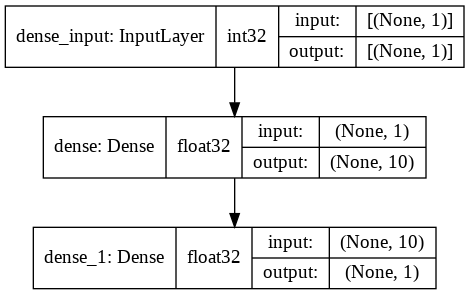

In [8]:
from keras.utils import plot_model
plot_model(model, show_dtype= True, show_layer_names= True, show_shapes= True)

## ❗❗❗❗ ***Quick Disclaimer:***  
There are two ways (Up untill now, I have all that learn) of saving a model. 
1. Saving by checkpoint ---> This allowes us to resume the training from where we have left.
2. Saving the mcomplete model >>> We will discuss this here.

## 💠 Save and Load Models.🔥🔥🔥🔥🔥
https://www.tensorflow.org/tutorials/keras/save_and_load  
> saving our model allowes us to use the model outside out jupyter notebook... here colab.
> There are two major way of doing this.  
1. **The SavedModel Format :** When we will use our model @ native tensorflow code.
2. **The Hdf5 format:** When we need to deploy the model, or there is other models from other frameworks/APIs.

In [9]:
# Importing the os
import os

In [10]:
# Downloading the dependencies
!pip install -q pyyaml h5py

In [11]:
!ls

drive  model.png  sample_data  Using_HDF5.h5  Using_SavedModel_format


In [12]:
os.listdir()

['.config',
 'model.png',
 'Using_HDF5.h5',
 'Using_SavedModel_format',
 'drive',
 'sample_data']

In [13]:
!ls -a

.   .config  model.png	  Using_HDF5.h5
..  drive    sample_data  Using_SavedModel_format


In [14]:
model.save?

### Saving the model using `SavedModel()`; for native tensorFlow

In [15]:
# Saving the model using SavedModel format
model.save("Using_SavedModel_format")

INFO:tensorflow:Assets written to: Using_SavedModel_format/assets


Let's discuss the content of the folder `Using_SavedModel_format`

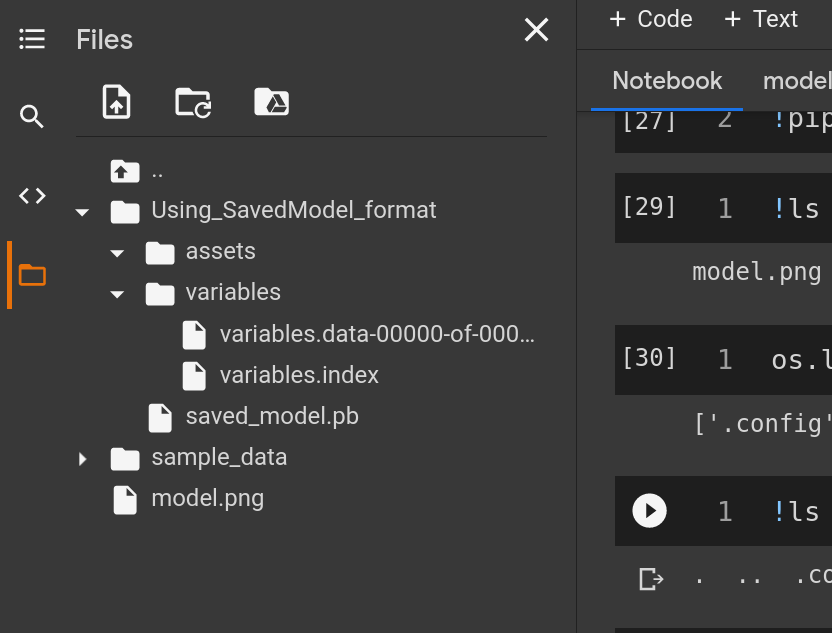

### Save using `HDF5`:  
> [Link: 📢 📢 📢](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) ***Hierarchical Data Format***  
HDF5 is a universal file format; and support the manipulation of the large file; In deployment and reusability.

In [16]:
model.save("Using_HDF5.h5")

In [17]:
!ls -a

.   .config  model.png	  Using_HDF5.h5
..  drive    sample_data  Using_SavedModel_format


### Loading a saved model:

In [18]:
# Summary of the base model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Loading the SavedModel format
loaded_SavedModel = tf.keras.models.load_model("/content/Using_SavedModel_format")
loaded_SavedModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


***As we can see that the base model and the saved model both are same.***

### Comparing the prediction for `saved_model` and `stock_model`

In [20]:
# base model
model_pred_new = model.predict(X_test)
model_pred_new

array([[ 81.44285 ],
       [ 86.86965 ],
       [ 92.29645 ],
       [ 97.72326 ],
       [103.15006 ],
       [108.57687 ],
       [114.00368 ],
       [119.43048 ],
       [124.857285],
       [130.28409 ]], dtype=float32)

In [21]:
# Saved_model
saved_model_pred = model.predict(X_test)
saved_model_pred

array([[ 81.44285 ],
       [ 86.86965 ],
       [ 92.29645 ],
       [ 97.72326 ],
       [103.15006 ],
       [108.57687 ],
       [114.00368 ],
       [119.43048 ],
       [124.857285],
       [130.28409 ]], dtype=float32)

***The prediction from those are exactly same***

In [22]:
# Since the base model and the saved model both are same
model_pred_new == saved_model_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Loading the HDF5 model

In [23]:
hdf5_model = keras.models.load_model("/content/Using_HDF5.h5")
hdf5_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Well the model is same. As expected.

### Download a file from google colab using code

In [24]:
from google.colab import files
files.download("/content/Using_HDF5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

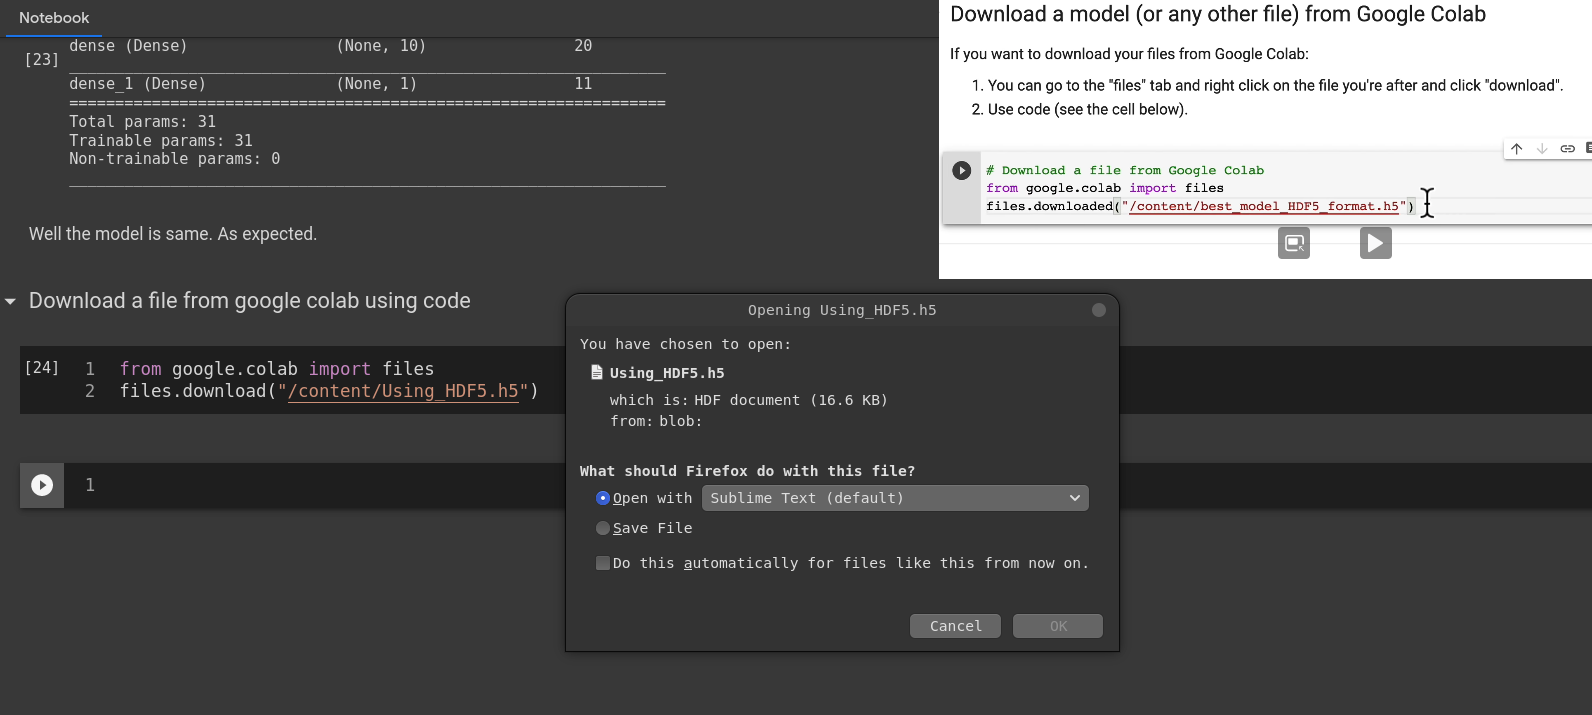

### Saving the file to google colab

In [25]:
!ls-a

/bin/bash: ls-a: command not found


In [26]:
!ls

drive  model.png  sample_data  Using_HDF5.h5  Using_SavedModel_format


In [29]:
!cp '/content/Using_HDF5.h5' '/content/drive/MyDrive/Colab Notebooks/Tensorflow - form Daniel Bourke'